In [ ]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

def plot_some_data(train_images, train_labels, class_names):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i]])
    plt.show()


def plot_some_predictions(test_images, test_labels, predictions, class_names, num_rows=5, num_cols=3):
    # Plot the first X test images, their predicted labels, and the true labels.
    # Color correct predictions in blue and incorrect predictions in red.   
    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions[i], test_labels, class_names, test_images)
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions[i], test_labels)
    plt.tight_layout()
    plt.show() 




def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

def plot_image(i, predictions_array, true_label, class_names, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)





Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_18 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
activation_19 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_19 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
activation_20 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 32)       

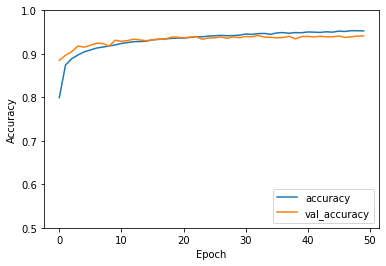

313/313 - 1s - loss: 0.1683 - accuracy: 0.9414

Test accuracy: 0.9413999915122986


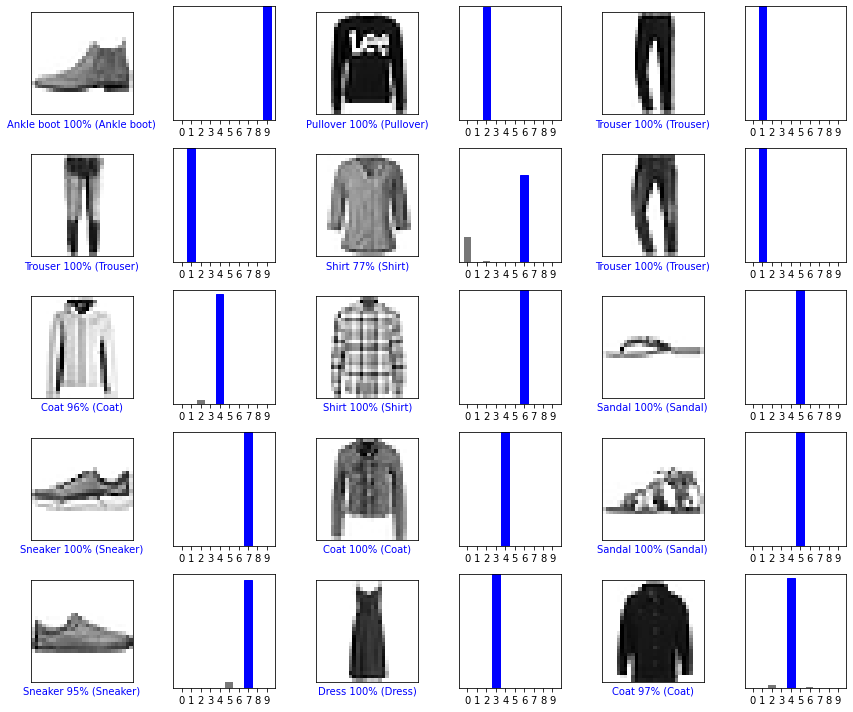

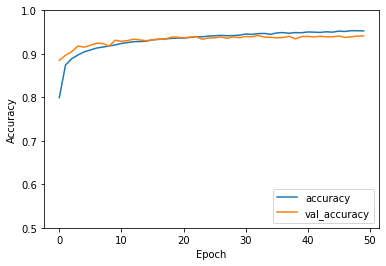

In [9]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers , models 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# from plots import plot_some_data, plot_some_predictions


fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

num_classes = 10

# Scale these values to a range of 0 to 1 before feeding them to the neural network model. 
# To do so, divide the values by 255. 
# It's important that the training set and the testing set be preprocessed in the same way
train_images = train_images / 255.0

test_images = test_images / 255.0

train_images_reshaped = train_images.reshape(-1,28,28,1)	# reshape to mum_train_images X height X width X channels, where channels = 1
test_images_reshaped = test_images.reshape(-1,28,28,1)	# reshape
# reshape completed
# print(train_images_reshaped.shape)
# print(test_images_reshaped.shape)

# Build the model
# Building the neural network requires configuring the layers of the model, then compiling the model.
n_input = 28

model = models.Sequential()# fill the model
# 1st Conv
model.add(layers.Conv2D(32, (3, 3), padding='same', activation=None, input_shape=(28, 28, 1)))
# 1st Batch Normalization
model.add(layers.BatchNormalization())
# 1st ReLU
model.add(layers.Activation('relu'))
# 2nd Conv
model.add(layers.Conv2D(32, (3, 3), padding='same', activation=None, input_shape=(28, 28, 1)))
# 2nd Batch Normalization
model.add(layers.BatchNormalization())
# 2nd ReLU
model.add(layers.Activation('relu'))
# 1st Max Pool
model.add(layers.MaxPooling2D((2, 2),padding='valid'))
# 1st Dropout
model.add(layers.Dropout(0.2))
# 3rd Conv
model.add(layers.Conv2D(64, (3, 3), padding='same', activation=None, input_shape=(14, 14, 32)))
# 3rd Batch Normalization
model.add(layers.BatchNormalization())
# 3rd ReLU
model.add(layers.Activation('relu'))
# 4th Conv
model.add(layers.Conv2D(64, (3, 3), padding='same', activation=None, input_shape=(14, 14, 64)))
# 4th Batch Normalization
model.add(layers.BatchNormalization())
# 4th ReLU
model.add(layers.Activation('relu'))
# 2nd Max Pool
model.add(layers.MaxPooling2D((2, 2),padding='valid'))
# 2nd Dropout
model.add(layers.Dropout(0.3))
# 5th Conv
model.add(layers.Conv2D(128, (3, 3), padding='same', activation=None, input_shape=(7, 7, 64)))
# 5th Batch Normalization
model.add((layers.BatchNormalization()))
# 5th ReLU
model.add(layers.Activation('relu'))
# 3rd Max Pool
model.add(layers.MaxPooling2D((2, 2),padding='valid'))
# 3rd Dropout
model.add(layers.Dropout(0.4))

model.summary()

# Now I will flatten the NN
# Flatten Layer
model.add(layers.Flatten())
# Dense 1
model.add(layers.Dense(200))
# 6th Batch Normalization
model.add(layers.BatchNormalization())
# 6th ReLU
model.add(layers.Activation('relu'))
# 4th Dropout
model.add(layers.Dropout(0.5))
# Dense 2
model.add(layers.Dense(10))

model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Train the model
# Training the neural network model requires the following steps:

#   1. Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
#   2. The model learns to associate images and labels.
#   3. You ask the model to make predictions about a test set—in this example, the test_images array.
#   4. Verify that the predictions match the labels from the test_labels array.

history = model.fit(train_images_reshaped, train_labels, epochs=50, validation_data=(test_images_reshaped, test_labels))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Evaluate accuracy
test_loss, test_acc = model.evaluate(test_images_reshaped,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

# Make predictions
# With the model trained, you can use it to make predictions about some images. 
# The model's linear outputs, logits. 
# Attach a softmax layer to convert the logits to probabilities, which are easier to interpret. 
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images_reshaped)

plot_some_predictions(test_images, test_labels, predictions, class_names, num_rows=5, num_cols=3)


plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()